In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [208]:
rajat_df = pd.read_csv ('dataset_distill.csv', sep=';')
rajat_df.head(2)

,Pressure,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T11,T12,T13,T14,L,V,D,B,F,Ethanol concentration
0,1.01,350.89,350.95,351.01,351.08,351.16,351.26,351.38,351.54,351.78,...,353.00,355.19,363.77,371.47,780,1040,260,340,600,0.82076
1,1.01,350.86,350.91,350.96,351.02,351.09,351.17,351.28,351.43,351.66,...,352.76,354.66,362.20,370.98,780,1040,260,340,600,0.83253


checking of data types in the data

In [209]:
rajat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pressure               4408 non-null   float64
 1   T1                     4408 non-null   float64
 2   T2                     4408 non-null   float64
 3   T3                     4408 non-null   float64
 4   T4                     4408 non-null   float64
 5   T5                     4408 non-null   float64
 6   T6                     4408 non-null   float64
 7   T7                     4408 non-null   float64
 8   T8                     4408 non-null   float64
 9   T9                     4408 non-null   float64
 10  T10                    4408 non-null   float64
 11  T11                    4408 non-null   float64
 12  T12                    4408 non-null   float64
 13  T13                    4408 non-null   float64
 14  T14                    4408 non-null   float64
 15  L   

In [210]:
rajat_df["L"].value_counts()

L
780         1102
450          586
130          586
1050         516
1040         516
22500        293
75           293
1,23E+08     258
1400         258
Name: count, dtype: int64

In [211]:
rajat_df["V"].value_counts()

V
1040        1102
600          586
390          586
1400         516
1300         516
22650        293
225          293
1,23E+09     258
1750         258
Name: count, dtype: int64

In [212]:
## handling exponential value in (L , V)
rajat_df['L'] = rajat_df['L'].apply(lambda x: int (float(x.split()[0].replace(',', ''))))
rajat_df['V'] = rajat_df['V'].apply(lambda x: int (float (x.split()[0].replace(',', ''))))

In [213]:
rajat_df["L"].value_counts()

L
780            1102
450             586
130             586
1050            516
1040            516
22500           293
75              293
12300000000     258
1400            258
Name: count, dtype: int64

In [214]:
rajat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pressure               4408 non-null   float64
 1   T1                     4408 non-null   float64
 2   T2                     4408 non-null   float64
 3   T3                     4408 non-null   float64
 4   T4                     4408 non-null   float64
 5   T5                     4408 non-null   float64
 6   T6                     4408 non-null   float64
 7   T7                     4408 non-null   float64
 8   T8                     4408 non-null   float64
 9   T9                     4408 non-null   float64
 10  T10                    4408 non-null   float64
 11  T11                    4408 non-null   float64
 12  T12                    4408 non-null   float64
 13  T13                    4408 non-null   float64
 14  T14                    4408 non-null   float64
 15  L   

checking for any NULL values in the data

In [215]:
rajat_df.isnull().sum()

Pressure                 0
T1                       0
T2                       0
T3                       0
T4                       0
T5                       0
T6                       0
T7                       0
T8                       0
T9                       0
T10                      0
T11                      0
T12                      0
T13                      0
T14                      0
L                        0
V                        0
D                        0
B                        0
F                        0
Ethanol concentration    0
dtype: int64

In [216]:
rajat_df.describe()

,Pressure,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T11,T12,T13,T14,L,V,D,B,F,Ethanol concentration
count,4408.00,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,...,4408.000000,4408.000000,4408.000000,4408.000000,4.408000e+03,4.408000e+03,4408.000000,4408.000000,4408.000000,4408.000000
mean,1.01,351.029049,351.409363,352.066202,352.828578,353.910204,355.214270,356.453975,357.539902,358.484004,...,360.048650,360.884025,364.367117,367.717250,7.199204e+08,7.199186e+09,251.823956,293.411978,545.235935,0.792205
std,0.00,0.334105,1.125225,2.671189,3.788418,4.986453,6.251028,7.119853,7.620257,7.882159,...,7.899189,7.604026,8.563034,6.639423,2.887664e+09,2.887664e+10,71.048000,108.550994,119.192840,0.076441
min,1.01,350.760000,350.770000,350.770000,350.790000,350.800000,350.820000,350.860000,350.910000,351.000000,...,351.500000,352.430000,353.150000,354.520000,7.500000e+01,2.250000e+02,150.000000,90.000000,350.000000,0.538190
25%,1.01,350.820000,350.860000,350.900000,350.950000,351.000000,351.070000,351.160000,351.280000,351.440000,...,352.220000,353.320000,354.750000,362.920000,4.500000e+02,6.000000e+02,150.000000,200.000000,350.000000,0.761890
50%,1.01,350.900000,350.990000,351.100000,351.260000,351.475000,351.840000,352.370000,352.930000,353.740000,...,356.785000,361.470000,370.745000,372.810000,7.800000e+02,1.040000e+03,260.000000,320.000000,600.000000,0.817520
75%,1.01,351.080000,351.390000,351.822500,352.410000,353.740000,356.867500,361.640000,364.750000,366.880000,...,367.522500,367.910000,372.440000,373.010000,1.050000e+03,1.400000e+03,260.000000,352.500000,600.000000,0.850280
max,1.01,352.320000,356.030000,364.970000,368.600000,369.060000,372.570000,372.970000,373.010000,373.010000,...,373.010000,373.010000,373.060000,373.070000,1.230000e+10,1.230000e+11,350.000000,450.000000,650.000000,0.891760


<Axes: xlabel='Ethanol concentration', ylabel='Count'>

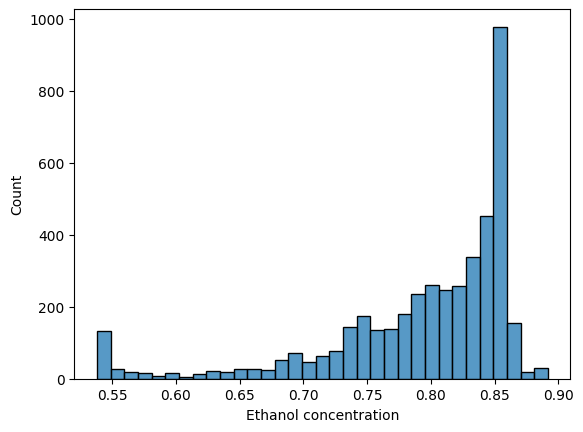

In [217]:
sns.histplot(rajat_df['Ethanol concentration'])

<Axes: >

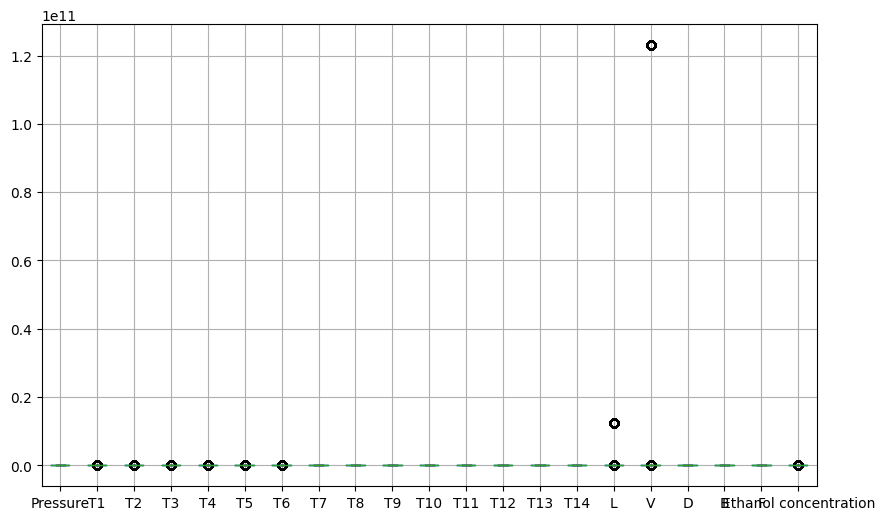

In [218]:
plt.figure(figsize=(10, 6))
rajat_df.boxplot()

In [219]:
from sklearn.model_selection import train_test_split

X = rajat_df.drop('Ethanol concentration' , axis=1)
y = rajat_df[['Ethanol concentration']]
columns = X.columns
X_train ,X_test, y_train , y_test = train_test_split(X, y , test_size=0.25, random_state=100)

Scaling of data

<Axes: title={'center': 'X_test'}>

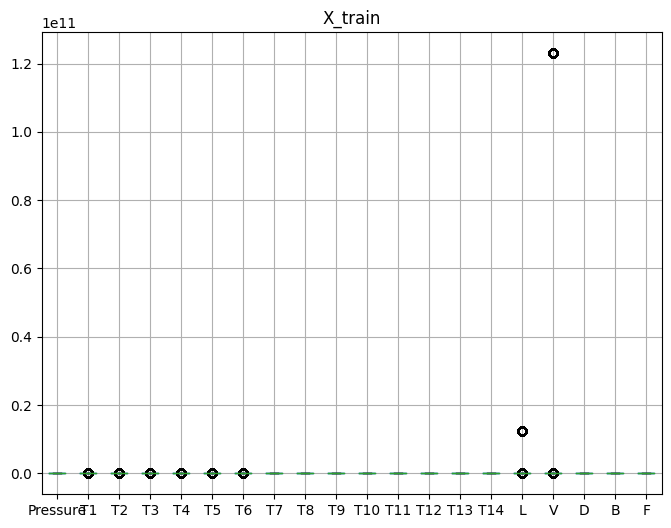

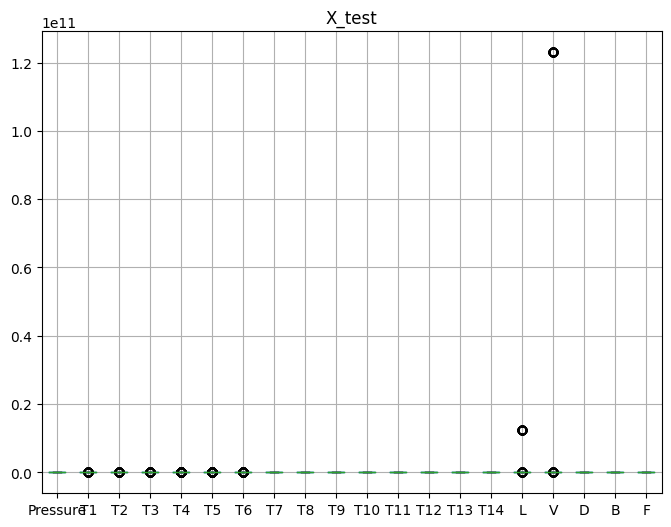

In [220]:
# Plots Before Scaling

plt.figure(figsize=(8, 6))
plt.title('X_train')
X_train.boxplot()
plt.figure(figsize=(8, 6))
plt.title('X_test')
X_test.boxplot()


In [221]:
from sklearn.preprocessing import MinMaxScaler

# function for sccaling of data
def data_scaler(data):

  n_columns =  X_train.columns
  return pd.DataFrame(MinMaxScaler().fit_transform(data), columns = n_columns)

In [222]:
X_train = data_scaler(X_train)
X_test = data_scaler(X_test)

<Axes: title={'center': 'X_test'}>

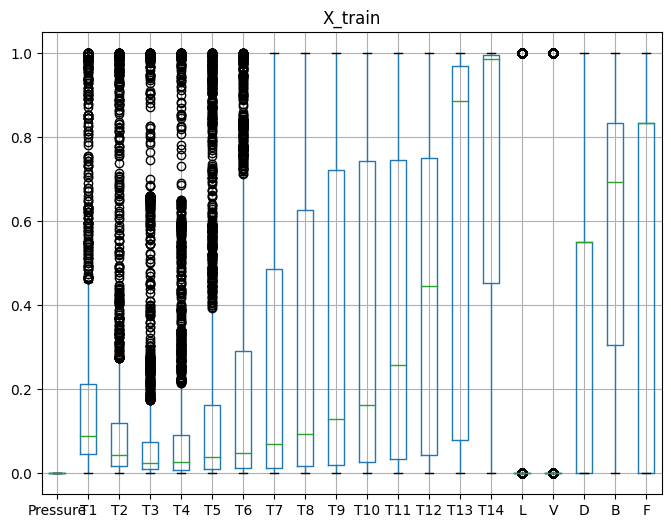

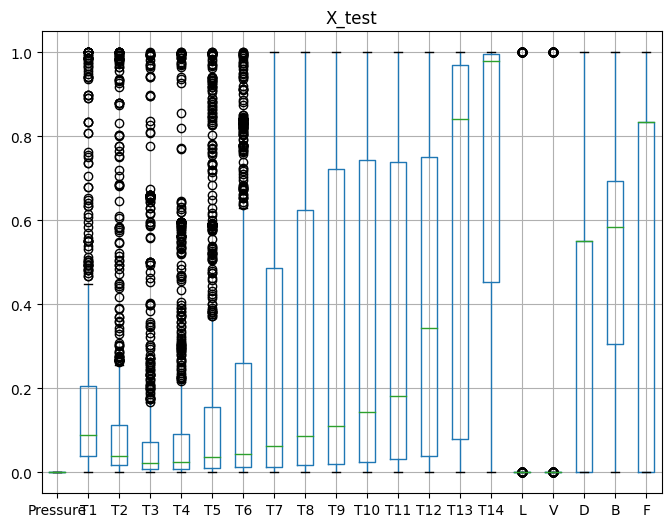

In [223]:
# Plots After Scaling

plt.figure(figsize=(8, 6))
plt.title('X_train')
X_train.boxplot()
plt.figure(figsize=(8, 6))
plt.title('X_test')
X_test.boxplot()

In [224]:
# # Function for dectecting the outliers in data.
# Input variables
# df = data frame
# data = specific column
def outlier_detector(df, data):

    q1 = np.percentile(df[data], 25)
    q3 = np.percentile(df[data], 75)
    iqr = q3 - q1
    threshold = 1.5 * iqr
    outliers = np.where((df[data] < q1 - threshold) | (df[data] > q3 + threshold))
    if len(outliers[0]) > 0:
        print(f'\nNumber of outliers in {data} is {len(outliers[0])}')
    else:
        print(f'\nThere are no outliers in {data}.')

In [225]:
for col in columns:
    outlier_detector(X_train, col)


There are no outliers in Pressure.

Number of outliers in T1 is 261

Number of outliers in T2 is 317

Number of outliers in T3 is 372

Number of outliers in T4 is 467

Number of outliers in T5 is 542

Number of outliers in T6 is 386

There are no outliers in T7.

There are no outliers in T8.

There are no outliers in T9.

There are no outliers in T10.

There are no outliers in T11.

There are no outliers in T12.

There are no outliers in T13.

There are no outliers in T14.

Number of outliers in L is 400

Number of outliers in V is 400

There are no outliers in D.

There are no outliers in B.

There are no outliers in F.


In [226]:
for col in columns:
    outlier_detector(X_test, col)


There are no outliers in Pressure.

Number of outliers in T1 is 88

Number of outliers in T2 is 112

Number of outliers in T3 is 123

Number of outliers in T4 is 155

Number of outliers in T5 is 178

Number of outliers in T6 is 141

There are no outliers in T7.

There are no outliers in T8.

There are no outliers in T9.

There are no outliers in T10.

There are no outliers in T11.

There are no outliers in T12.

There are no outliers in T13.

There are no outliers in T14.

Number of outliers in L is 151

Number of outliers in V is 151

There are no outliers in D.

There are no outliers in B.

There are no outliers in F.


Outlier Handling by constraing the maximum and minimum values.

In [227]:
# Function for handling the outliers
# Input variables
# df = data frame
# data = specific column
def outlier_handler(df, data):

    q1 = np.percentile(df[data], 25)
    q3 = np.percentile(df[data], 75)
    iqr = q3 - q1
    min_limit = q1 - (1.5 * iqr)
    max_limit = q3 + (1.5 * iqr)
    df[data] = np.where(df[data] > max_limit, max_limit,
                       np.where(df[data] < min_limit, min_limit,
                       df[data]))

In [228]:
for col in columns:
    outlier_handler(X_train, col)
    outlier_handler(X_test, col)

In [229]:
for col in columns:
    outlier_detector(X_train, col)


There are no outliers in Pressure.

There are no outliers in T1.

There are no outliers in T2.

There are no outliers in T3.

There are no outliers in T4.

There are no outliers in T5.

There are no outliers in T6.

There are no outliers in T7.

There are no outliers in T8.

There are no outliers in T9.

There are no outliers in T10.

There are no outliers in T11.

There are no outliers in T12.

There are no outliers in T13.

There are no outliers in T14.

There are no outliers in L.

There are no outliers in V.

There are no outliers in D.

There are no outliers in B.

There are no outliers in F.


In [230]:
for col in columns:
    outlier_detector(X_test, col)


There are no outliers in Pressure.

There are no outliers in T1.

There are no outliers in T2.

There are no outliers in T3.

There are no outliers in T4.

There are no outliers in T5.

There are no outliers in T6.

There are no outliers in T7.

There are no outliers in T8.

There are no outliers in T9.

There are no outliers in T10.

There are no outliers in T11.

There are no outliers in T12.

There are no outliers in T13.

There are no outliers in T14.

There are no outliers in L.

There are no outliers in V.

There are no outliers in D.

There are no outliers in B.

There are no outliers in F.


<Axes: >

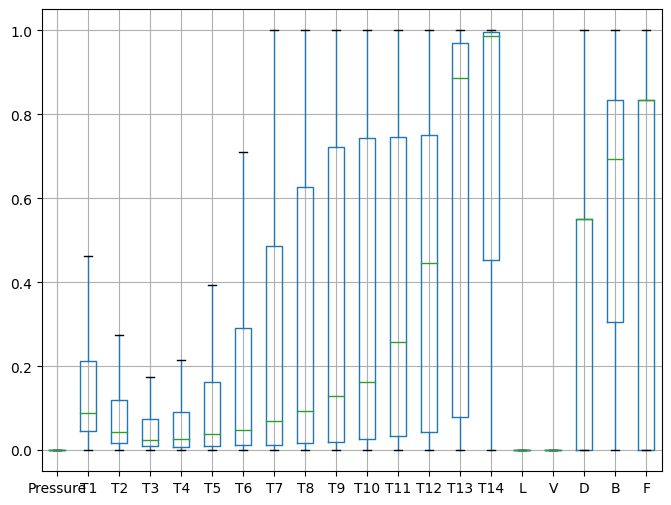

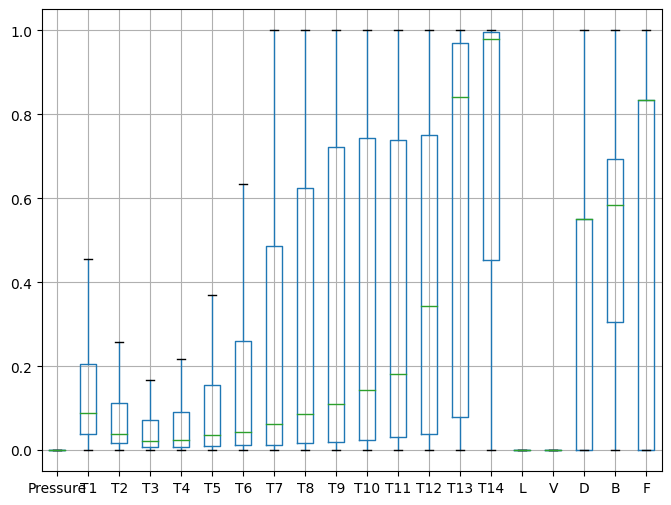

In [231]:
# Plots after outlier removal
plt.figure(figsize=(8, 6))
X_train.boxplot()
plt.figure(figsize=(8, 6))
X_test.boxplot()

Model Training and testing

In [232]:
# function for visualization od predicted and actual ntest values
def results(y_true, preds):

        indices = range(len(y_true[:50]))
        plt.plot(indices, y_true[:50], label='True Values', color='black')
        plt.scatter(indices, preds[:50], label='Predicted Values', color='magenta')
        plt.xlabel('Data Point Number')
        plt.ylabel('Data Value')
        plt.title('Actual Value vs Predicted Value')
        plt.legend()
        plt.show()

LR

In [233]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train , y_train)
y_pred_LR= LR.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

MAE_LR = mean_absolute_error(y_test, y_pred_LR)
r2_LR = r2_score(y_test, y_pred_LR)

print("MAE_LR:", MAE_LR)
print("R^2 Score_LR:", r2_LR)

# Using MAE and R2 for checking the prediction of model.

MAE_LR: 0.010262637622646328
R^2 Score_LR: 0.949860908373465


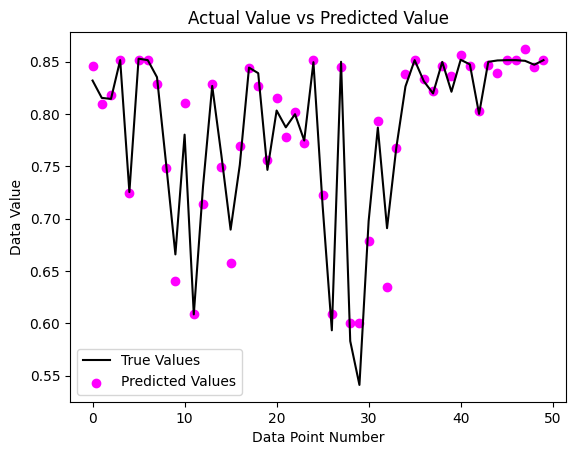

In [234]:
results(y_test,y_pred_LR)

SVR

In [235]:
from sklearn.svm import SVR

svr = SVR (kernel='poly', gamma=0.87,C= 0.01)
svr.fit(X_train , y_train)
y_pred_svr= svr.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


MAE_SVR = mean_absolute_error(y_test, y_pred_svr)
r2_SVR = r2_score(y_test, y_pred_svr)

print("MAE_svr:", MAE_SVR)
print("R^2 Score_svr:", r2_SVR)



MAE_svr: 0.0585161718978438
R^2 Score_svr: 0.2968489943269714


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


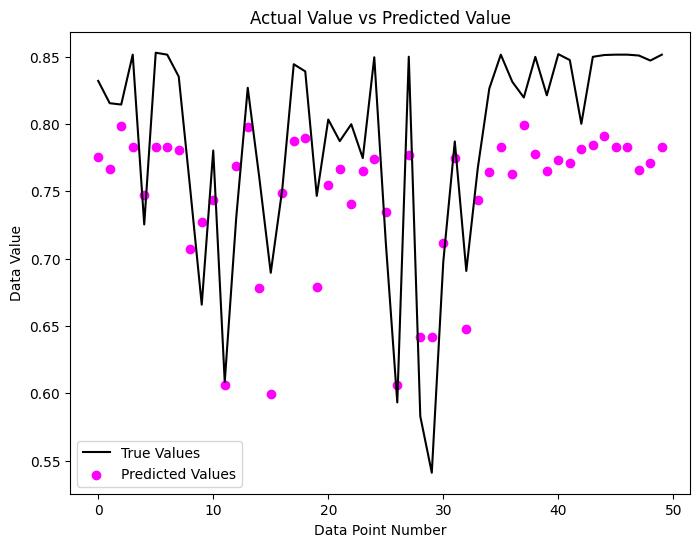

In [236]:
plt.figure(figsize=(8, 6))
results(y_test,y_pred_svr)